In [15]:
import pandas as pd
import numpy as np

# load the csv file that is downloaded from google forms.
file_path = 'FormAnswers.csv'
data = pd.read_csv(file_path)
n_criteria = 5

def create_pairwise_matrix(answers):
    matrix = np.ones((n_criteria, n_criteria))
    try:
        matrix[0, 1] = answers[0]  # Cost vs Compatibility
        matrix[1, 0] = 1 / answers[0]
        
        matrix[1, 2] = answers[1]  # Compatibility vs User Acceptance
        matrix[2, 1] = 1 / answers[1]
        
        matrix[2, 3] = answers[2]  # User Acceptance vs Management
        matrix[3, 2] = 1 / answers[2]
        
        matrix[3, 4] = answers[3]  # Management vs Conditional Access
        matrix[4, 3] = 1 / answers[3]
        
        matrix[0, 2] = answers[4]  # Cost vs User Acceptance
        matrix[2, 0] = 1 / answers[4]
        
        matrix[0, 3] = answers[5]  # Cost vs Management
        matrix[3, 0] = 1 / answers[5]
        
        matrix[0, 4] = answers[6]  # Cost vs Conditional Access
        matrix[4, 0] = 1 / answers[6]
        
        matrix[1, 3] = answers[7]  # Compatibility vs Management
        matrix[3, 1] = 1 / answers[7]
        
        matrix[1, 4] = answers[8]  # Compatibility vs Conditional Access
        matrix[4, 1] = 1 / answers[8]
        
        matrix[2, 4] = answers[9]  # User Acceptance vs Conditional Access
        matrix[4, 2] = 1 / answers[9]
    except ZeroDivisionError:
        raise ValueError("Zero Divison Error!.")
    return matrix

#Consistency Ratio (C.R.)
def calculate_consistency_ratio(matrix):
    eigvals, eigvecs = np.linalg.eig(matrix)
    max_eigval = np.max(eigvals).real
    CI = (max_eigval - n_criteria) / (n_criteria - 1)
    RI = 1.12  # Random Index 5 = 1.12, update this accordingly.
    CR = CI / RI
    return CR

numerical_data = data.iloc[:, -10:]
numerical_data = numerical_data.apply(pd.to_numeric, errors='coerce')
numerical_data = numerical_data.dropna()
consistency_ratios = []

for idx, row in numerical_data.iterrows():
    answers = row.values
    try:
        pairwise_matrix = create_pairwise_matrix(answers)
        CR = calculate_consistency_ratio(pairwise_matrix)
        consistency_ratios.append(CR)
    except ValueError as e:
        print(f"could not process row: error. {idx}: {e}")
        consistency_ratios.append(np.nan)

# Add C.R. to the google forms csv
data['Consistency Ratio'] = consistency_ratios

#new csv file, same structure as the 
output_file_path = 'FormAnswers_with_CR.csv'
data.to_csv(output_file_path, index=False)

print(f"Consistency Ratios have been calculated and saved to {output_file_path}")


Consistency Ratios have been calculated and saved to FormAnswers_with_CR.csv


Consistency Ratios within 2 standard deviations:
0     1.324138e-01
1     1.199323e-01
2     1.891728e-01
3     1.852513e-01
4     1.887931e-01
5     2.672552e-01
7     4.002742e-01
8     1.882314e-01
9    -1.982541e-16
10    2.014150e-01
11    1.514540e-01
12    2.189508e-01
13    1.412888e-01
14    7.730311e-02
15    1.828602e-01
16    2.220398e-01
Name: Consistency Ratio, dtype: float64

Consistency Ratios outside 2 standard deviations:
6    0.469368
Name: Consistency Ratio, dtype: float64


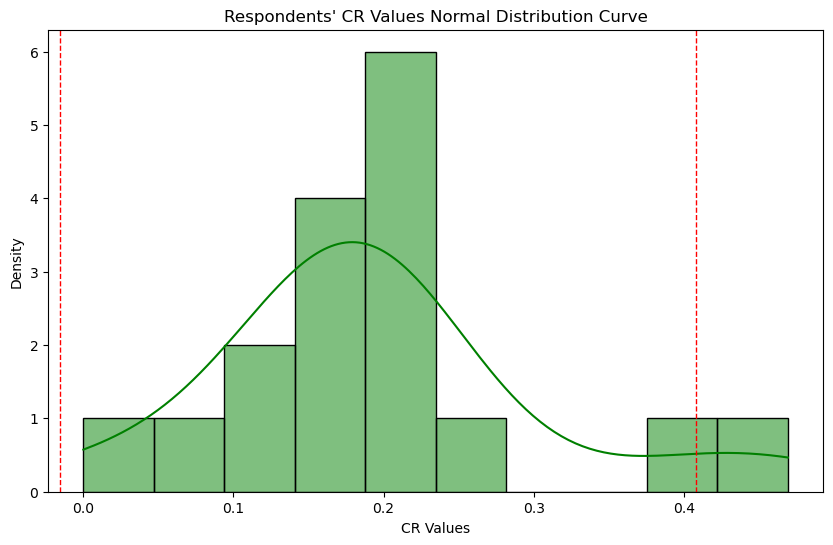

In [17]:
# this code block has some errors, the calculating are correct, however the printing of numbes isnt ideal and should be avoided
# 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'FormAnswers_with_CR.csv'
data = pd.read_csv(file_path)

cr_values = data['Consistency Ratio'].dropna()

mean_cr = np.mean(cr_values)
std_cr = np.std(cr_values)

within_2_std = cr_values[(cr_values >= mean_cr - 2 * std_cr) & (cr_values <= mean_cr + 2 * std_cr)]
outside_2_std = cr_values[(cr_values < mean_cr - 2 * std_cr) | (cr_values > mean_cr + 2 * std_cr)]

print("Consistency Ratios within 2 standard deviations:")
print(within_2_std)

print("\nConsistency Ratios outside 2 standard deviations:")
print(outside_2_std)

plt.figure(figsize=(10, 6))
sns.histplot(cr_values, kde=True, color='green', bins=10)
plt.axvline(mean_cr - 2 * std_cr, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_cr + 2 * std_cr, color='red', linestyle='dashed', linewidth=1)
plt.title('Respondents\' CR Values Normal Distribution Curve')
plt.xlabel('CR Values')
plt.ylabel('Density')
plt.show()



Consistency Ratios within 2 standard deviations:
0.132414
0.119932
0.189173
0.185251
0.188793
0.267255
0.400274
0.188231
-0.000000
0.201415
0.151454
0.218951
0.141289
0.077303
0.182860
0.222040

Consistency Ratios outside 2 standard deviations:
0.469368


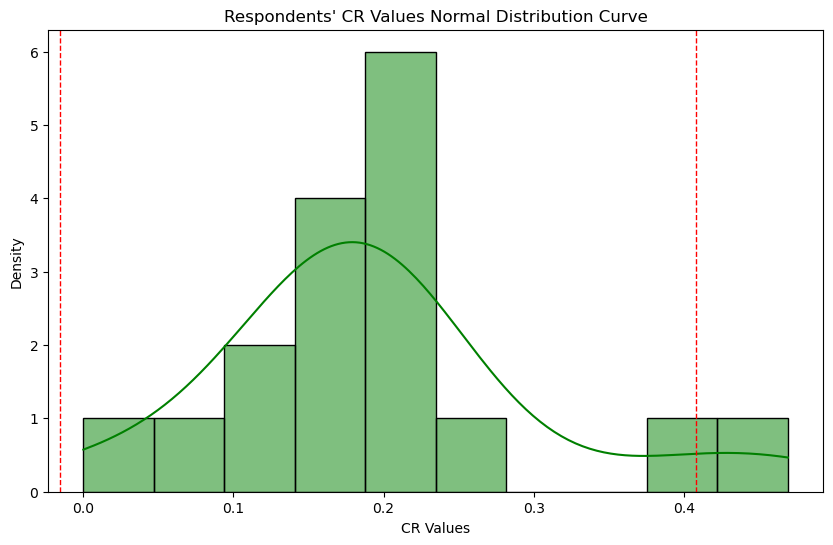

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Manually enter C.R values in the np array, provides a much easier result to read.
cr_values = np.array([
    0.132414, 0.119932, 0.189173, 0.185251, 0.188793, 0.267255, 
    0.469368, 0.400274, 0.188231, -1.98e-16, 0.201415, 0.151454, 
    0.218951, 0.141289, 0.077303, 0.18286, 0.22204
])

mean_cr = np.mean(cr_values)
std_cr = np.std(cr_values)

within_2_std = cr_values[(cr_values >= mean_cr - 2 * std_cr) & (cr_values <= mean_cr + 2 * std_cr)]
outside_2_std = cr_values[(cr_values < mean_cr - 2 * std_cr) | (cr_values > mean_cr + 2 * std_cr)]

within_2_std_list = within_2_std.tolist()
outside_2_std_list = outside_2_std.tolist()

print("Consistency Ratios within 2 standard deviations:")
for cr in within_2_std_list:
    print(f"{cr:.6f}")

print("\nConsistency Ratios outside 2 standard deviations:")
for cr in outside_2_std_list:
    print(f"{cr:.6f}")

plt.figure(figsize=(10, 6))
sns.histplot(cr_values, kde=True, color='green', bins=10)
plt.axvline(mean_cr - 2 * std_cr, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_cr + 2 * std_cr, color='red', linestyle='dashed', linewidth=1)
plt.title('Respondents\' CR Values Normal Distribution Curve')
plt.xlabel('CR Values')
plt.ylabel('Density')
plt.show()


In [21]:
import pandas as pd
import numpy as np

file_path = 'Updated.csv'
data = pd.read_csv(file_path)
n_criteria = 5

def create_pairwise_matrix(answers):
    matrix = np.ones((n_criteria, n_criteria))
    
    # Fill in the matrix with the provided answers
    matrix[0, 1] = answers[0]  # Cost vs Compatibility
    matrix[1, 0] = 1 / answers[0]
    
    matrix[1, 2] = answers[1]  # Compatibility vs User Acceptance
    matrix[2, 1] = 1 / answers[1]
    
    matrix[2, 3] = answers[2]  # User Acceptance vs Management
    matrix[3, 2] = 1 / answers[2]
    
    matrix[3, 4] = answers[3]  # Management vs Conditional Access
    matrix[4, 3] = 1 / answers[3]
    
    matrix[0, 2] = answers[4]  # Cost vs User Acceptance
    matrix[2, 0] = 1 / answers[4]
    
    matrix[0, 3] = answers[5]  # Cost vs Management
    matrix[3, 0] = 1 / answers[5]
    
    matrix[0, 4] = answers[6]  # Cost vs Conditional Access
    matrix[4, 0] = 1 / answers[6]
    
    matrix[1, 3] = answers[7]  # Compatibility vs Management
    matrix[3, 1] = 1 / answers[7]
    
    matrix[1, 4] = answers[8]  # Compatibility vs Conditional Access
    matrix[4, 1] = 1 / answers[8]
    
    matrix[2, 4] = answers[9]  # User Acceptance vs Conditional Access
    matrix[4, 2] = 1 / answers[9]
    return matrix

def calculate_weights(matrix):
    eigvals, eigvecs = np.linalg.eig(matrix)
    max_eigval_index = np.argmax(eigvals)
    eigvec = eigvecs[:, max_eigval_index].real
    weights = eigvec / np.sum(eigvec)
    return weights

aggregated_matrix = np.zeros((n_criteria, n_criteria))
numeric_data = data.iloc[:, 1:11].astype(float)

for idx, row in numeric_data.iterrows():
    answers = row.values
    pairwise_matrix = create_pairwise_matrix(answers)
    aggregated_matrix += pairwise_matrix

aggregated_matrix /= len(numeric_data)
weights = calculate_weights(aggregated_matrix)
criteria = ["Cost", "Compatibility", "User Acceptance", "Management", "Conditional Access"]
weights_dict = {crit: weight for crit, weight in zip(criteria, weights)}

for crit, weight in weights_dict.items():
    print(f"{crit}: {weight:.4f}")

print("Aggregated Matrix:\n", aggregated_matrix)
print("Weights:", weights)


Cost: 0.3383
Compatibility: 0.2765
User Acceptance: 0.1747
Management: 0.1213
Conditional Access: 0.0892
Aggregated Matrix:
 [[1.         2.6875     2.54375    3.3125     3.375     ]
 [0.5        1.         3.9375     3.1875     3.375     ]
 [0.55648148 0.43660714 1.         3.9375     2.125     ]
 [0.51264881 0.51264881 0.44747024 1.         3.1875    ]
 [0.51004464 0.52924107 0.67604167 0.50580357 1.        ]]
Weights: [0.33832594 0.27648001 0.17470745 0.12129111 0.0891955 ]
